In [20]:
import yaml
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
trainDf = pd.read_csv('train_hw.csv')
testDf = pd.read_csv('test_hw.csv')

trainID = trainDf['Id']
testID = testDf['Id']

trainDf.drop('Id', axis = 1, inplace = True)
testDf.drop('Id', axis = 1, inplace = True)

print(trainDf.columns)
trainDf.head(10)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,NaN,8750,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,148500
1,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000
2,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,167900
3,120,RM,NaN,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,165000
4,80,RL,NaN,14112,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180500
5,90,RL,74.0,13101,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,142600
6,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
7,20,RL,76.0,9120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,1400,11,2008,WD,Normal,163000
8,60,RL,NaN,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,188000
9,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900


In [22]:
for column in trainDf.columns:
    print(f"\n=== {column} ===")
    print(trainDf[column].value_counts(dropna=False))


=== MSSubClass ===
MSSubClass
20     447
60     234
50     102
120     73
30      57
160     51
70      47
80      43
90      43
190     21
85      14
75      13
45      11
180      9
40       3
Name: count, dtype: int64

=== MSZoning ===
MSZoning
RL         917
RM         173
FV          54
RH          15
C (all)      9
Name: count, dtype: int64

=== LotFrontage ===
LotFrontage
NaN      209
60.0     113
70.0      55
80.0      51
75.0      47
        ... 
128.0      1
124.0      1
141.0      1
160.0      1
46.0       1
Name: count, Length: 107, dtype: int64

=== LotArea ===
LotArea
7200     19
9600     18
9000     14
6000     13
10800     9
         ..
9142      1
6204      1
6629      1
3363      1
16669     1
Name: count, Length: 895, dtype: int64

=== Street ===
Street
Pave    1162
Grvl       6
Name: count, dtype: int64

=== Alley ===
Alley
NaN     1097
Grvl      38
Pave      33
Name: count, dtype: int64

=== LotShape ===
LotShape
Reg    739
IR1    392
IR2     31
IR3      6
Name: c

SalePrice - цена продажи недвижимости в долларах.  
MSSubClass - класс здания (значения 20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190).  
MSZoning - общая классификация зонирования (A, C, FV, I, RH, RL, RP, RM).  
LotFrontage - длина улицы, соединенной с участком, в футах.  
LotArea - размер участка в квадратных футах.  
Street - тип доступа к дороге (Grvl, Pave).  
Alley - тип доступа к переулку (Grvl, Pave, NA).  
LotShape - общая форма участка (Reg, IR1, IR2, IR3).  
LandContour - рельеф участка (Lvl, Bnk, HLS, Low).  
Utilities - доступные коммунальные услуги (AllPub, NoSewr, NoSeWa, ELO).  
LotConfig - конфигурация участка (Inside, Corner, CulDSac, FR2, FR3).  
LandSlope - уклон участка (Gtl, Mod, Sev).  
Neighborhood - район в пределах города Эймс (различные районы: CollgCr, Veenker, Crawfor и др.).  
Condition1 - близость к главной дороге или железной дороге (Norm, Feedr, Artery, RRAn, PosN и др.).  
Condition2 - близость ко второй главной дороге или железной дороге (Norm, Feedr, Artery, RRAn и др.).  
BldgType - тип жилища (1Fam, 2FmCon, Duplx, TwnhsE, TwnhsI).  
HouseStyle - стиль жилища (1Story, 2Story, 1.5Fin, 1.5Unf, 2.5Fin и др.).  
OverallQual - общая оценка качества материалов и отделки (от 1 до 10).  
OverallCond - общая оценка состояния (от 1 до 10).  
YearBuilt - год постройки (от 1872 до 2010).  
YearRemodAdd - год последнего ремонта или реконструкции (от 1950 до 2010).  
RoofStyle - тип крыши (Flat, Gable, Gambrel, Hip, Mansard, Shed).  
RoofMatl - материал крыши (ClyTile, CompShg, Membran, Metal, Roll, Tar&Grv и др.).  
Exterior1st - основное внешнее покрытие дома (VinylSd, MetalSd, BrkFace и др.).  
Exterior2nd - вторичное внешнее покрытие дома (если есть) (VinylSd, MetalSd, BrkFace и др.).  
MasVnrType - тип каменного шпона (BrkCmn, BrkFace, None, Stone).  
MasVnrArea - площадь каменного шпона в квадратных футах (от 0 до 1600).  
ExterQual - качество внешних материалов (Ex, Gd, TA, Fa, Po).  
ExterCond - текущее состояние внешних материалов (Ex, Gd, TA, Fa, Po).  
Foundation - тип фундамента (BrkTil, CBlock, PConc, Slab, Stone, Wood).  
BsmtQual - высота подвала (Ex, Gd, TA, Fa, Po, NA).  
BsmtCond - общее состояние подвала (Ex, Gd, TA, Fa, Po, NA).  
BsmtExposure - наличие окон или выхода в сад (Gd, Av, Mn, No, NA).  
BsmtFinType1 - качество отделки подвала (GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA).  
BsmtFinSF1 - площадь отделки первого типа в подвале (от 0 до 5644).  
BsmtFinType2 - качество второй отделки подвала (GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA).  
BsmtFinSF2 - площадь второй отделки подвала в квадратных футах (от 0 до 1500).  
BsmtUnfSF - площадь неотделанного подвала (от 0 до 2336).  
TotalBsmtSF - общая площадь подвала (от 0 до 6110).  
Heating - тип отопления (Floor, GasA, GasW, Grav, OthW, Wall).  
HeatingQC - качество и состояние отопления (Ex, Gd, TA, Fa, Po).  
CentralAir - наличие центрального кондиционирования (N, Y).  
Electrical - электрическая система (SBrkr, FuseA, FuseF, FuseP, Mix).  
1stFlrSF - площадь первого этажа в квадратных футах (от 334 до 4692).  
2ndFlrSF - площадь второго этажа в квадратных футах (от 0 до 2065).  
LowQualFinSF - площадь низкокачественной отделки в квадратных футах (от 0 до 572).  
GrLivArea - общая жилая площадь над землей в квадратных футах (от 334 до 5642).  
BsmtFullBath - количество полноценных ванных комнат в подвале (от 0 до 3).  
BsmtHalfBath - количество половинных ванных комнат в подвале (от 0 до 2).  
FullBath - количество полноценных ванных комнат над землей (от 0 до 4).  
HalfBath - количество половинных ванных комнат над землей (от 0 до 2).  
Bedroom - количество спален выше уровня подвала (от 0 до 8).  
Kitchen - количество кухонь (от 0 до 3).  
KitchenQual - качество кухни (Ex, Gd, TA, Fa, Po).  
TotRmsAbvGrd - общее количество комнат над землей (не включая ванные) (от 2 до 14).  
Functional - рейтинг функциональности дома (Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal).  
Fireplaces - количество каминов (от 0 до 3).  
FireplaceQu - качество камина (Ex, Gd, TA, Fa, Po, NA).  
GarageType - расположение гаража (2Types, Attchd, Basmt, BuiltIn, CarPort, Detchd, NA).  
GarageYrBlt - год постройки гаража (от 1900 до 2010, NA если нет).  
GarageFinish - внутренняя отделка гаража (Fin, RFn, Unf, NA).  
GarageCars - вместимость гаража в машинах (от 0 до 4).  
GarageArea - площадь гаража в квадратных футах (от 0 до 1418).  
GarageQual - качество гаража (Ex, Gd, TA, Fa, Po, NA).  
GarageCond - состояние гаража (Ex, Gd, TA, Fa, Po, NA).  
PavedDrive - наличие асфальтированной подъездной дороги (Y, P, N).  
WoodDeckSF - площадь деревянной террасы в квадратных футах (от 0 до 857).  
OpenPorchSF - площадь открытой веранды в квадратных футах (от 0 до 547).  
EnclosedPorch - площадь закрытой веранды в квадратных футах (от 0 до 286).  
3SsnPorch - площадь веранды для трех сезонов в квадратных футах (от 0 до 508).  
ScreenPorch - площадь веранды с москитной сеткой в квадратных футах (от 0 до 480).  
PoolArea - площадь бассейна в квадратных футах (от 0 до 800).  
PoolQC - качество бассейна (Ex, Gd, TA, Fa, NA).  
Fence - качество забора (GdPrv, MnPrv, GdWo, MnWw, NA).  
MiscFeature - дополнительные характеристики (Elev, Gar2, Othr, Shed, TenC, NA).  
MiscVal - стоимость дополнительных характеристик в долларах (от 0 до 15500).  
MoSold - месяц продажи (от 1 до 12).  
YrSold - год продажи (от 2006 до 2010).  
SaleType - тип продажи (WD, CWD, VWD, New, COD, Con и др.).  
SaleCondition - состояние продажи (Normal, Abnorml, AdjLand, Alloca, Family, Partial).  

# Data Processing

## Outliers

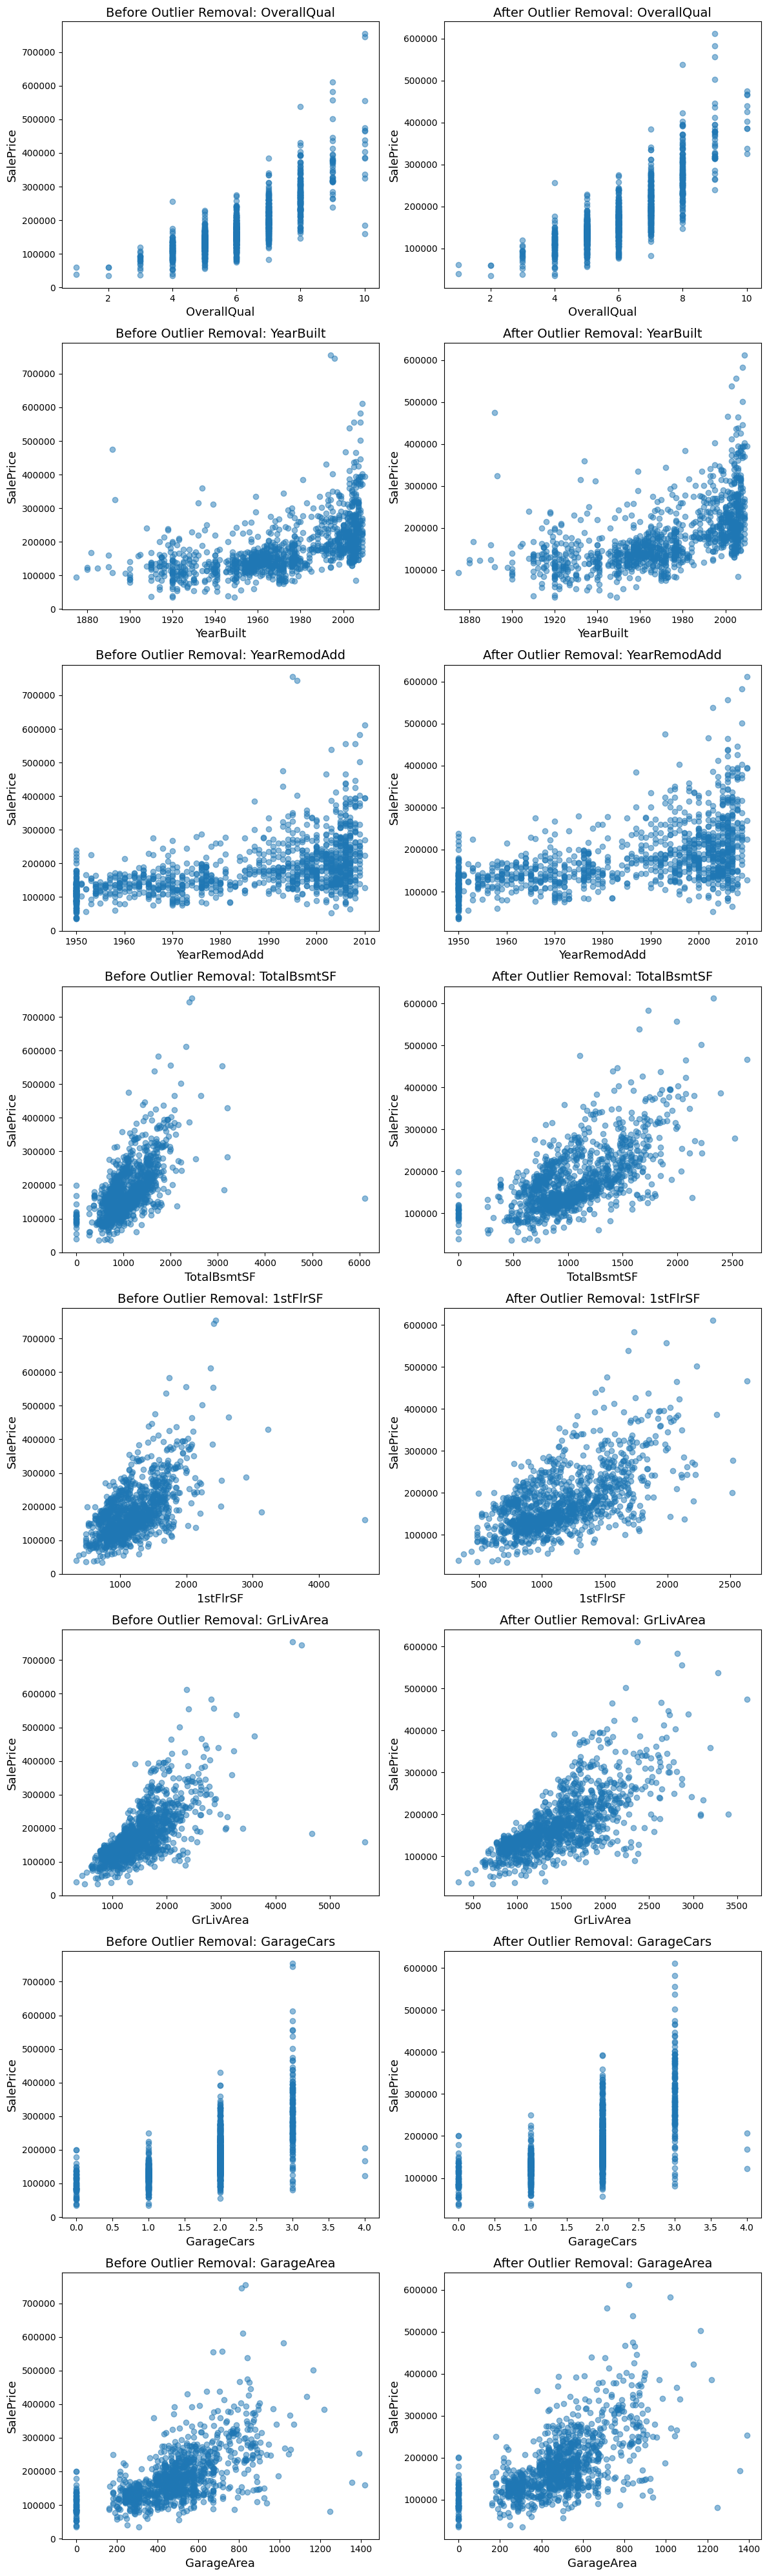

In [23]:
corrFeatures = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']

fig, axes = plt.subplots(len(corrFeatures), 2, figsize=(12, 5 * len(corrFeatures)))

for i, feature in enumerate(corrFeatures):
    axes[i, 0].scatter(x=trainDf[feature], y=trainDf['SalePrice'], alpha=0.5)
    axes[i, 0].set_title(f'Before Outlier Removal: {feature}', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=13)
    axes[i, 0].set_ylabel('SalePrice', fontsize=13)

trainDf = trainDf.drop(trainDf[(trainDf['GrLivArea']>4000)].index)
trainDf = trainDf.drop(trainDf[(trainDf['TotalBsmtSF']>2750)].index)
trainDf = trainDf.drop(trainDf[(trainDf['1stFlrSF']>2750)].index)

for i, feature in enumerate(corrFeatures):
    axes[i, 1].scatter(x=trainDf[feature], y=trainDf['SalePrice'], alpha=0.5)
    axes[i, 1].set_title(f'After Outlier Removal: {feature}', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=13)
    axes[i, 1].set_ylabel('SalePrice', fontsize=13)

plt.tight_layout()
plt.show()

## Target Variable

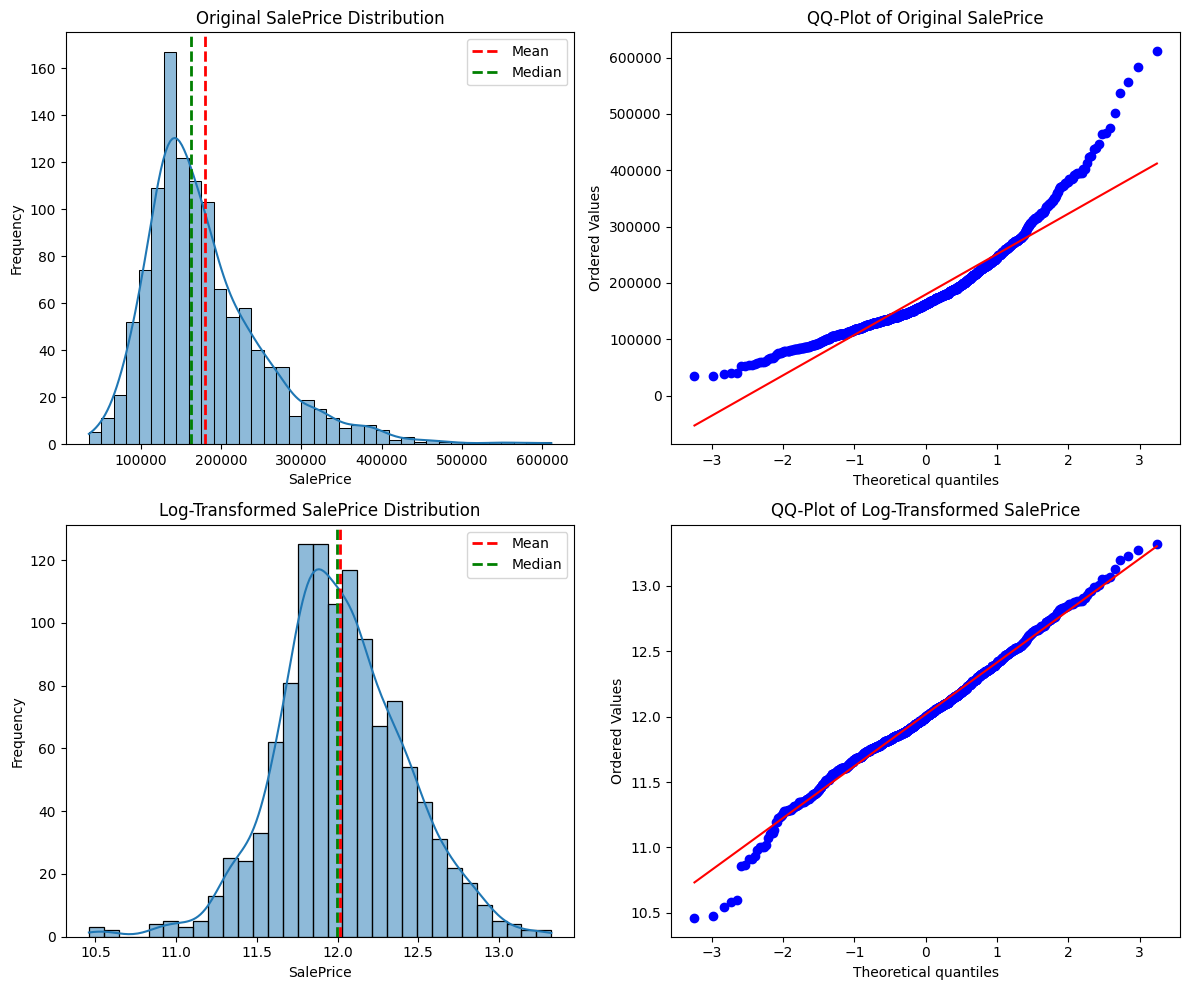

In [24]:
import scipy.stats as stats

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(trainDf['SalePrice'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original SalePrice Distribution')
axes[0, 0].set_ylabel('Frequency')

axes[0, 0].axvline(trainDf['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
axes[0, 0].axvline(trainDf['SalePrice'].median(), color='g', linestyle='dashed', linewidth=2, label='Median')
axes[0, 0].legend()

stats.probplot(trainDf['SalePrice'], plot=axes[0, 1])
axes[0, 1].set_title('QQ-Plot of Original SalePrice')

trainDf["SalePrice"] = np.log1p(trainDf["SalePrice"])

sns.histplot(trainDf['SalePrice'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log-Transformed SalePrice Distribution')
axes[1, 0].set_ylabel('Frequency')

axes[1, 0].axvline(trainDf['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
axes[1, 0].axvline(trainDf['SalePrice'].median(), color='g', linestyle='dashed', linewidth=2, label='Median')
axes[1, 0].legend()

stats.probplot(trainDf['SalePrice'], plot=axes[1, 1])
axes[1, 1].set_title('QQ-Plot of Log-Transformed SalePrice')

plt.tight_layout()
plt.show()


## Data correlation

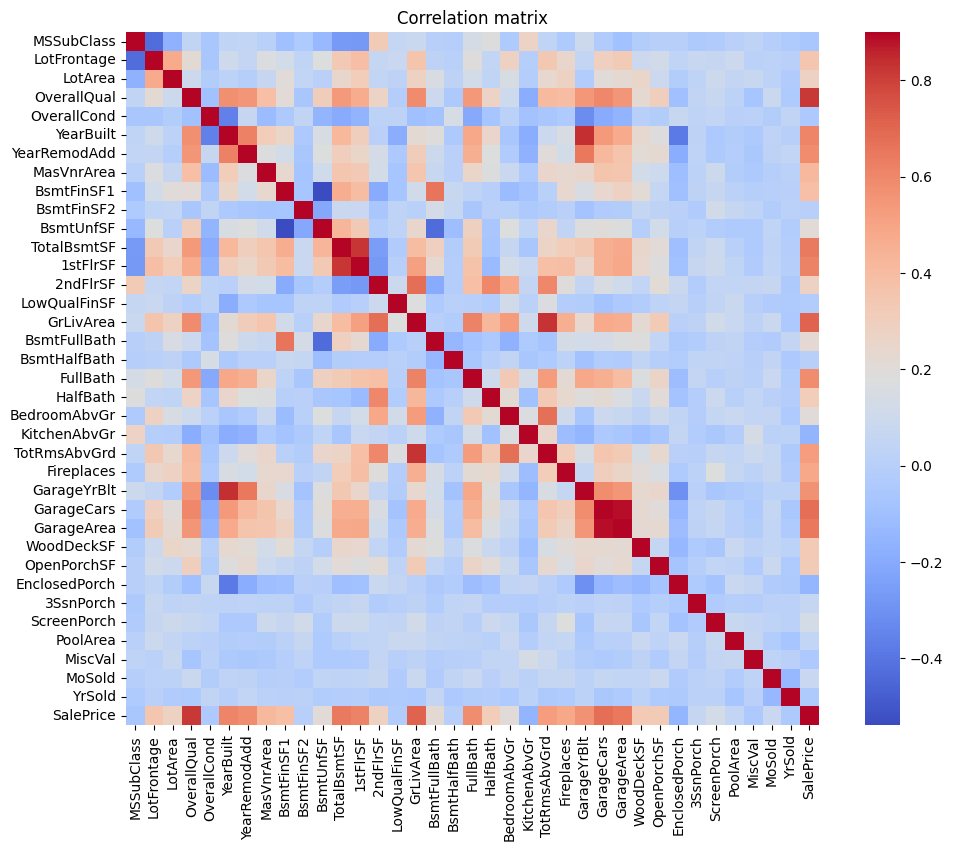

In [25]:
numericCols = trainDf.select_dtypes(include=['number'])
plt.figure(figsize=(12, 9))
sns.heatmap(numericCols.corr(), vmax=0.9, square=True, cmap="coolwarm", annot=False)
plt.title("Correlation matrix")
plt.show()

## Missing Data

In [26]:
ntrain = trainDf.shape[0]
ntest = testDf.shape[0]

Ytrain = trainDf['SalePrice'].values
allData = pd.concat((trainDf, testDf)).reset_index(drop=True)
allData.drop(['SalePrice'], axis=1, inplace=True)

In [27]:
allDataNan = (allData.isnull().sum() / len(allData)) * 100
allDataNan = allDataNan[allDataNan > 0].sort_values(ascending=False)
missingData = pd.DataFrame({'Missing Ratio': allDataNan})

display(missingData)

,Missing Ratio
PoolQC,99.655647
MiscFeature,96.280992
Alley,93.732782
Fence,80.716253
MasVnrType,59.848485
FireplaceQu,47.520661
LotFrontage,17.699725
GarageType,5.578512
GarageYrBlt,5.578512
GarageFinish,5.578512


In [28]:
def fillMissing(df):
    df['PoolQC'] = df['PoolQC'].fillna('None')
    df['MiscFeature'] = df['MiscFeature'].fillna('None')
    df['Alley'] = df['Alley'].fillna('None')
    df['Fence'] = df['Fence'].fillna('None')
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )

    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')

    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
        
    return df


allData = fillMissing(allData)

In [29]:
allDataNan = (allData.isnull().sum() / len(allData)) * 100
allDataNan = allDataNan[allDataNan > 0].sort_values(ascending=False)
missingData = pd.DataFrame({'Missing Ratio': allDataNan})

display(missingData)

,Missing Ratio
BsmtExposure,2.61708


## Categorization

In [30]:
def categorization(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['OverallCond'] = df['OverallCond'].astype(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)

    return df

allData = categorization(allData)

# Encoding

### Ordered sets

In [31]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lb = LabelEncoder() 
    lb.fit(list(allData[col].values)) 
    allData[col] = lb.transform(list(allData[col].values))   
print("Shape all_data: {}".format(allData.shape))

Shape all_data: (1452, 79)


# Feature engineering

In [32]:
allData['TotalSF'] = allData['TotalBsmtSF'] + allData['1stFlrSF'] + allData['2ndFlrSF']

### Skewed features

In [33]:
from scipy.stats import skew

numCols = allData.select_dtypes(exclude=['object']).columns

skewedCols = allData[numCols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewedCols})

display(skewness)

,Skew
MiscVal,24.384665
PoolArea,17.480260
LotArea,12.567122
3SsnPorch,10.264751
LowQualFinSF,8.976484
LandSlope,4.793904
KitchenAbvGr,4.469701
BsmtFinSF2,4.308643
ScreenPorch,4.128821
BsmtHalfBath,4.118080


In [34]:
from scipy.special import boxcox1p

skewness = skewness[abs(skewness) > 0.75].dropna()
print(f"There are {len(skewness)} skewed numerical features.")

skewedFeatures = skewness.index
for feat in skewedFeatures:
    skewValue = skewness.loc[feat, 'Skew']

    if abs(skewValue) > 2: 
        lam = 0.05  
    elif abs(skewValue) > 0.75:
        lam = 0.15

    allData[feat] = boxcox1p(allData[feat], lam)

There are 33 skewed numerical features.


### Categorical features

In [35]:
allData = pd.get_dummies(allData)
print(allData.shape)

trainDf = allData[:ntrain]
testDf = allData[ntrain:]

(1452, 222)


### RMSE

In [36]:
from sklearn.model_selection import KFold, cross_val_score

def rmsle_cv(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, trainDf.values, Ytrain, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Models

In [37]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor

models = {
    #"Linear Regression": make_pipeline(RobustScaler(), LinearRegression()),
    "Lasso Regression": make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=42)),
    "Elastic Net": make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=42)),
    #"Ridge Regression": Ridge(alpha=3, random_state=42),
    #"XGBoost Regressor": XGBRegressor()
}

Lasso Regression score: 0.1149 (0.0141)
Elastic Net score: 0.1149 (0.0141)
RMSE (Lasso Regression) на тренировочном наборе: 18766.74 (log: 9.84)
RMSE (Elastic Net) на тренировочном наборе: 18690.67 (log: 9.84)


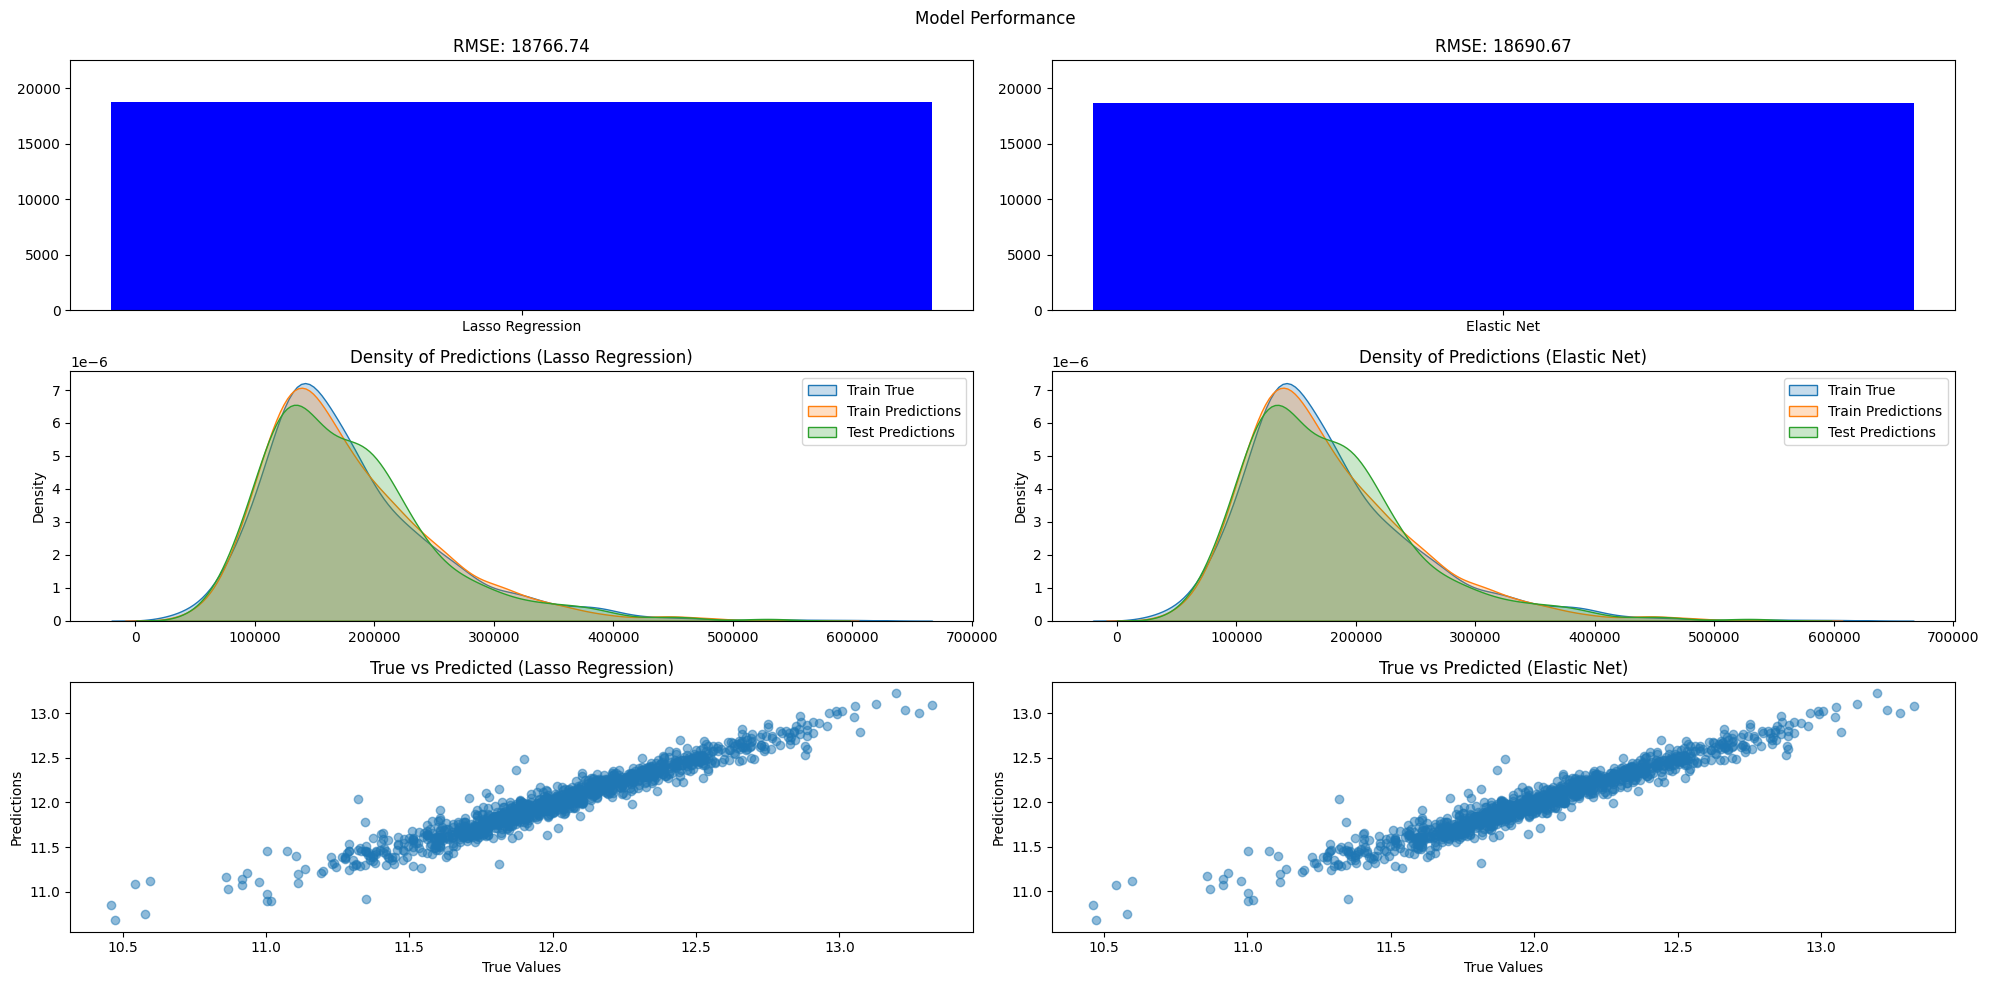

Лучший алгоритм: Elastic Net с RMSE 18690.67
Файл submission.csv сохранён!


In [38]:
from sklearn.metrics import mean_squared_error

for name, model in models.items():
    score = rmsle_cv(model)
    print(f"{name} score: {score.mean():.4f} ({score.std():.4f})")

fig, axes = plt.subplots(3, len(models), figsize=(20, 10))
fig.suptitle('Model Performance')

results = {}
for i, (name, model) in enumerate(models.items()):
    model.fit(trainDf.values, Ytrain)
    YtrainPred = model.predict(trainDf.values)
    YtestPred = model.predict(testDf.values)

    YtrainPredExp = np.expm1(YtrainPred)
    YtrainExp = np.expm1(Ytrain)
    YtestPredExp = np.expm1(YtestPred)

    trainRMSE = np.sqrt(mean_squared_error(YtrainExp, YtrainPredExp))
    logRMSE = np.log1p(trainRMSE)
    results[name] = trainRMSE
    print(f'RMSE ({name}) на тренировочном наборе: {trainRMSE:.2f} (log: {logRMSE:.2f})')

    sns.kdeplot(YtrainExp, label='Train True', fill=True, ax=axes[1, i])
    sns.kdeplot(YtrainPredExp, label='Train Predictions', fill=True, ax=axes[1, i])
    sns.kdeplot(YtestPredExp, label='Test Predictions', fill=True, ax=axes[1, i])
    axes[1, i].set_title(f'Density of Predictions ({name})')
    axes[1, i].legend()

    axes[2, i].scatter(Ytrain, YtrainPred, alpha=0.5)
    axes[2, i].set_xlabel('True Values')
    axes[2, i].set_ylabel('Predictions')
    axes[2, i].set_title(f'True vs Predicted ({name})')

for i, (name, score) in enumerate(results.items()):
    axes[0, i].bar(name, score, color='blue')
    axes[0, i].set_title(f'RMSE: {score:.2f}')
    axes[0, i].set_ylim(0, max(results.values()) * 1.2)

plt.tight_layout()
plt.show()

bestModelName = min(results, key=results.get)
finalModel = models[bestModelName].fit(trainDf.values, Ytrain)
YtestPredFinal = np.expm1(finalModel.predict(testDf.values))

submission = pd.DataFrame({
    'Id': testID,
    'SalePrice': YtestPredFinal
})
submission.to_csv('submission.csv', index=False)

print(f"Лучший алгоритм: {bestModelName} с RMSE {results[bestModelName]:.2f}")
print("Файл submission.csv сохранён!")